In [1]:
import anndata
import numpy as np

from IPython.display import display
import pandas as pd
import urllib.request

from scegot import scEGOT

from pathlib import Path


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/data1/home/jyj/miniconda3/envs/gtra_bench/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/data1/home/jyj/miniconda3/envs/gtra_bench/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/data1/home/jyj/miniconda3/envs/gtra_bench/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/data1/home/jyj/miniconda3/envs/gtra_bench/lib/python3.9/site-packages/traitlets/con

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/data1/home/jyj/miniconda3/envs/gtra_bench/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/data1/home/jyj/miniconda3/envs/gtra_bench/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/data1/home/jyj/miniconda3/envs/gtra_bench/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/data1/home/jyj/miniconda3/envs/gtra_bench/lib/python3.9/site-packages/traitlets/con

AttributeError: _ARRAY_API not found

/data1/home/jyj/miniconda3/envs/gtra_bench/lib/python3.9/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [3]:
import scanpy as sc
DATA_PATH = Path("/data3/projects/2025_GTRA/data/2_HSPC")
adata = sc.read_h5ad(DATA_PATH / "HSPC_preproc.h5ad")
top_genes = pd.read_csv(DATA_PATH / "HVG_genes.txt").values.reshape(-1).tolist()

In [5]:
celltype_mapping = {
    "myel. prog. #1": "MYP",
    "myel. prog. #2": "MYP",
    "myel. prog. #3":"MYP",
    'ery. prog. #1':"EryP",
    'ery. prog. #2':"EryP",
    'ery. prog. #3':"EryP",
    "HSCs #1":"HSCs",
    "HSCs #2":"HSCs",
    "LMPPs #1":"LMPPs",
    "LMPPs #2":"LMPPs",
    "MK prog.":"MKP",
    "eosinophil prog.":"eosiP"
}

adata.obs["celltype"] = adata.obs["clusters"].map(celltype_mapping)

In [6]:
hspc_dim = pd.DataFrame(adata.obsm["X_umap"], columns=["UMAP-1","UMAP-2"])
hspc_dim.index = adata.obs_names.copy()
hspc_dim["clusters"] = adata.obs["clusters"].copy()
hspc_dim["celltype"] = adata.obs["celltype"].copy()
hspc_dim["time"] = adata.obs["time"].copy()

In [17]:
adata_filter = adata[:,top_genes]

In [20]:
import anndata
counts = adata_filter.to_df()
input_data = anndata.AnnData(counts, obs=adata_filter.obs, var=adata_filter.var)

In [24]:
input_data.obs

,hashtags,time,clusters,celltype
AAACCCAGTGTTCATG-1-control,tag3,control,myel. prog. #1,MYP
AAACGAACAAGTAGTA-1-control,tag2,control,ery. prog. #3,EryP
AAACGAACACATTCTT-1-control,tag1,control,MK prog.,MKP
AAACGAACATGGAACG-1-control,tag1,control,myel. prog. #2,MYP
AAACGAACATTCAGGT-1-control,tag1,control,HSCs #1,HSCs
...,...,...,...,...
TTTGTTGAGGAAGTCC-1-72h,tag4,72h,myel. prog. #1,MYP
TTTGTTGAGTCTTGGT-1-72h,tag1,72h,MK prog.,MKP
TTTGTTGCACCGGTCA-1-72h,tag3,72h,ery. prog. #1,EryP
TTTGTTGCAGAGCGTA-1-72h,tag2,72h,LMPPs #1,LMPPs


In [28]:
time_order = ["control","3h","24h","72h"]
input_data.obs["time"] = pd.Categorical(
    input_data.obs["time"], 
    categories=time_order, 
    ordered=True)

In [29]:
input_data = input_data[input_data.obs["time"].cat.codes.argsort()]

In [30]:
scegot = scEGOT(
    input_data,
    verbose=True,  # default=True
    adata_day_key="time",
)

Processing AnnData...


In [31]:
RANDOM_STATE = 2023
PCA_N_COMPONENTS = 30
GMM_CLUSTER_NUMBERS = [6, 6, 6, 6]
UMAP_N_NEIGHBORS = 1000
DAY_NAMES = ["control","3h","24h","72h"]


In [32]:
%%time
X, pca_model = scegot.preprocess(
    PCA_N_COMPONENTS,
    recode_params={},
    umi_target_sum=1e5,
    pca_random_state=RANDOM_STATE,
    pca_other_params={},
    apply_recode=True,
    apply_normalization_log1p=True,
    apply_normalization_umi=True,
    select_genes=False,
    # n_select_genes=2000,
)

Applying RECODE...
start RECODE for scRNA-seq data
end RECODE for scRNA-seq
log: {'seq_target': 'RNA', '#significant genes': np.int64(2929), '#non-significant genes': np.int64(537), '#silent genes': np.int64(0), 'ell': np.int64(278), 'Elapsed time': '0h 0m 9s 500ms', 'solver': 'full'}
Applying UMI normalization...
Applying log1p normalization...
Applying PCA...
	sum of explained_variance_ratio = 65.87017072360159
CPU times: user 8min 10s, sys: 9.39 s, total: 8min 19s
Wall time: 11.1 s


In [33]:
%%time
# scegot.day_names = [11,13,15,17]

gmm_models, gmm_labels = scegot.fit_predict_gmm(
    n_components_list=GMM_CLUSTER_NUMBERS,
    covariance_type="full",
    max_iter=2000,
    n_init=10,
    random_state=RANDOM_STATE,
    gmm_other_params={},
)

Fitting GMM models with each day's data and predicting labels for them...


100%|██████████| 4/4 [00:06<00:00,  1.73s/it]

CPU times: user 5min 29s, sys: 1.77 s, total: 5min 30s
Wall time: 6.91 s


In [35]:
cluster_names = scegot.generate_cluster_names_with_day()


In [37]:
%%time
X_umap, umap_model = scegot.apply_umap(
    UMAP_N_NEIGHBORS,
    n_components=2,
    random_state=RANDOM_STATE,
    min_dist=0.8,
    umap_other_params={},
)

CPU times: user 3min 10s, sys: 3.29 s, total: 3min 13s
Wall time: 2min 38s


In [38]:
G = scegot.make_cell_state_graph(
    cluster_names,
    mode="pca",
    threshold=0.5,
)
G_umap = scegot.make_cell_state_graph(
    cluster_names,
    mode="umap",
    threshold=0.5,
)

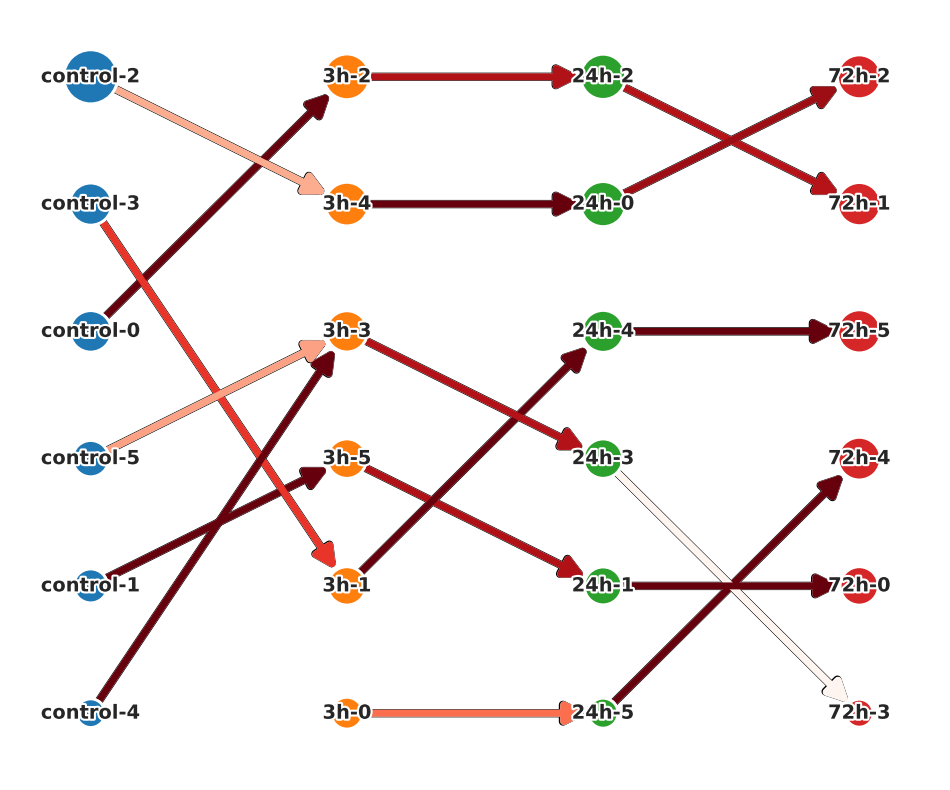

In [39]:
scegot.plot_simple_cell_state_graph(
    G_umap,
    layout="hierarchy",
    order="weight",
    # save=True,
    # save_path="./simple_cell_state_graph_hierarchy.png"
)

In [40]:
# edge list 추출 — weight, similarity, score 등 자동 감지
edges = []
for u, v, d in G.edges(data=True):
    # 가능한 키 중 존재하는 걸 우선 사용
    weight = d.get("edge_weights") or d.get("similarity") or d.get("score") or 1.0
    edges.append((u, v, weight))

import pandas as pd
edge_df = pd.DataFrame(edges, columns=["source_cluster", "target_cluster", "weight"])
edge_df.head()



,source_cluster,target_cluster,weight
0,control-0,3h-2,0.999520
1,3h-2,24h-2,0.919007
2,control-1,3h-5,1.000000
3,3h-5,24h-1,0.920674
4,control-2,3h-4,0.648893


In [42]:
input_data.obs

,hashtags,time,clusters,celltype
AAACCCAGTGTTCATG-1-control,tag3,control,myel. prog. #1,MYP
GTAGGAGCATTGCCGG-1-control,tag2,control,myel. prog. #1,MYP
GTAGGAGGTAGTGCGA-1-control,tag1,control,LMPPs #2,LMPPs
GTAGGTTAGCGTCAAG-1-control,tag3,control,ery. prog. #2,EryP
GTAGGTTTCGTCCTTG-1-control,tag2,control,myel. prog. #1,MYP
...,...,...,...,...
CCATCACTCGATGCAT-1-72h,tag1,72h,MK prog.,MKP
CCATCACTCGGCTGGT-1-72h,tag1,72h,HSCs #2,HSCs
CCCAACTCAAATGGTA-1-72h,tag2,72h,myel. prog. #1,MYP
CCATAAGCAGGTCTCG-1-72h,tag4,72h,HSCs #2,HSCs


In [50]:
import pandas as pd

all_label_df = []

# scEGOT 내부 데이터 순회
for (tp,X_t), labels in zip(zip(DAY_NAMES,scegot.X_selected), gmm_labels):
    # 해당 시점의 셀 ID 리스트
    cell_ids = X_t.index.tolist()
    
    # label과 셀 ID 매핑
    tmp = pd.DataFrame({
        "cellid": cell_ids,
        "scegot_GMM": labels,
        "timepoints":tp
    })
    
    # 원래 input_data.obs에서 cell type 등 메타데이터 병합
    tmp = tmp.merge(
        input_data.obs.loc[cell_ids, ["celltype"]].reset_index(),
        left_on="cellid",
        right_on="index",
        how="left"
    ).drop(columns=["index"])
    
    all_label_df.append(tmp)

# 모든 시점 결합
all_label_df = pd.concat(all_label_df, ignore_index=True)

# ✅ 결과 확인


In [51]:
all_label_df

,cellid,scegot_GMM,timepoints,celltype
0,AAACCCAGTGTTCATG-1-control,2,control,MYP
1,GTAGGAGCATTGCCGG-1-control,2,control,MYP
2,GTAGGAGGTAGTGCGA-1-control,3,control,LMPPs
3,GTAGGTTAGCGTCAAG-1-control,5,control,EryP
4,GTAGGTTTCGTCCTTG-1-control,2,control,MYP
...,...,...,...,...
9978,CCATCACTCGATGCAT-1-72h,0,72h,MKP
9979,CCATCACTCGGCTGGT-1-72h,5,72h,HSCs
9980,CCCAACTCAAATGGTA-1-72h,2,72h,MYP
9981,CCATAAGCAGGTCTCG-1-72h,1,72h,HSCs


In [52]:
df

,source_cluster,target_cluster,weight,src_tp,src_clust,tgt_tp,tgt_clust
0,control-0,3h-2,0.999520,NaN,NaN,NaN,NaN
1,3h-2,24h-2,0.919007,NaN,NaN,NaN,NaN
2,control-1,3h-5,1.000000,NaN,NaN,NaN,NaN
3,3h-5,24h-1,0.920674,NaN,NaN,NaN,NaN
4,control-2,3h-4,0.648893,NaN,NaN,NaN,NaN
5,3h-4,24h-0,1.000000,NaN,NaN,NaN,NaN
6,control-3,3h-1,0.825914,NaN,NaN,NaN,NaN
7,3h-1,24h-4,1.000000,NaN,NaN,NaN,NaN
8,control-4,3h-3,1.000000,NaN,NaN,NaN,NaN
9,3h-3,24h-3,0.913148,NaN,NaN,NaN,NaN


In [56]:
edge_df

,source_cluster,target_cluster,weight
0,control-0,3h-2,0.999520
1,3h-2,24h-2,0.919007
2,control-1,3h-5,1.000000
3,3h-5,24h-1,0.920674
4,control-2,3h-4,0.648893
5,3h-4,24h-0,1.000000
6,control-3,3h-1,0.825914
7,3h-1,24h-4,1.000000
8,control-4,3h-3,1.000000
9,3h-3,24h-3,0.913148


In [58]:
import pandas as pd
import numpy as np

# === 0️⃣ 준비 ===
df = edge_df.copy()

# --- allowed transitions (HSPCs rule) ---
allowed = {
    "HSCs": {"HSCs", "LMPPs", "MYP"},
    "LMPPs": {"LMPPs", "MYP"},
    "MYP": {"MYP", "EryP", "MKP", "eosiP"},
    "EryP": {"EryP"},
    "MKP": {"MKP"},
    "eosiP": {"eosiP"}
}

# === 1️⃣ 각 cluster의 major cell type 찾기 ===
def get_major_type(tp, clust):
    subset = all_label_df[
        (all_label_df["timepoints"].str.lower() == str(tp).lower()) &
        (all_label_df["scegot_GMM"].astype(str) == str(clust))
    ]
    if subset.empty:
        return None
    return subset["celltype"].value_counts().idxmax()

# === 2️⃣ source / target 분리 (control, 3h, 24h, 72h 패턴 지원) ===
df[["src_tp", "src_clust"]] = df["source_cluster"].str.extract(r"([A-Za-z0-9]+)-(\d+)")
df[["tgt_tp", "tgt_clust"]] = df["target_cluster"].str.extract(r"([A-Za-z0-9]+)-(\d+)")

# === 3️⃣ 각 cluster의 major cell type 매핑 ===
df["src_type"] = df.apply(lambda r: get_major_type(r["src_tp"], r["src_clust"]), axis=1)
df["tgt_type"] = df.apply(lambda r: get_major_type(r["tgt_tp"], r["tgt_clust"]), axis=1)

# === 4️⃣ major type → lineage type 변환 ===
def get_type(name):
    if pd.isna(name):
        return None
    for t in allowed.keys():
        if t in name:
            return t
    return None

df["src_type2"] = df["src_type"].apply(get_type)
df["tgt_type2"] = df["tgt_type"].apply(get_type)

# === 5️⃣ 유효성 평가 ===
df["is_correct"] = df.apply(
    lambda r: r["tgt_type2"] in allowed.get(r["src_type2"], set()), axis=1
)

# === 6️⃣ FN 포함한 F1 계산 ===
pred_edges = set(zip(df["src_type2"], df["tgt_type2"]))
true_edges = {(src, tgt) for src, tgts in allowed.items() for tgt in tgts}

TP = len(true_edges & pred_edges)           # 정답이고 예측한 전이
FP = len(pred_edges - true_edges)           # 예측했지만 틀린 전이
FN = len(true_edges - pred_edges)           # 정답인데 예측 안 한 전이

precision = TP / (TP + FP + 1e-9)
recall = TP / (TP + FN + 1e-9)
f1 = 2 * precision * recall / (precision + recall + 1e-9)

# === 7️⃣ 결과 출력 ===
print("=== Transition Evaluation (HSPCs) ===")
print(f"TP = {TP}")
print(f"FP = {FP}")
print(f"FN = {FN}")
print(f"Precision = {precision:.3f}")
print(f"Recall = {recall:.3f}")
print(f"F1 = {f1:.3f}")

# 필요 시 각 전이 결과 테이블 확인
df[["source_cluster", "target_cluster", "src_type2", "tgt_type2", "is_correct"]]


=== Transition Evaluation (HSPCs) ===
TP = 7
FP = 0
FN = 5
Precision = 1.000
Recall = 0.583
F1 = 0.737


,source_cluster,target_cluster,src_type2,tgt_type2,is_correct
0,control-0,3h-2,LMPPs,LMPPs,True
1,3h-2,24h-2,LMPPs,LMPPs,True
2,control-1,3h-5,MKP,MKP,True
3,3h-5,24h-1,MKP,MKP,True
4,control-2,3h-4,MYP,MYP,True
5,3h-4,24h-0,MYP,MYP,True
6,control-3,3h-1,HSCs,HSCs,True
7,3h-1,24h-4,HSCs,HSCs,True
8,control-4,3h-3,EryP,EryP,True
9,3h-3,24h-3,EryP,EryP,True
